In [1]:
import torch
import matplotlib.pyplot as plt

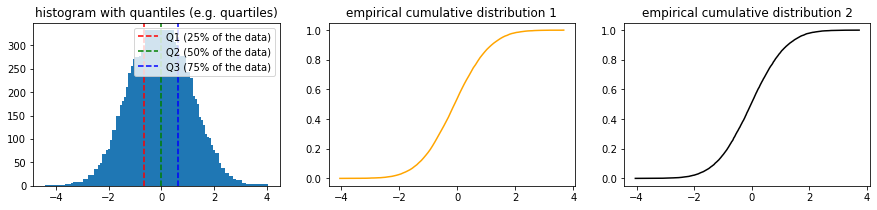

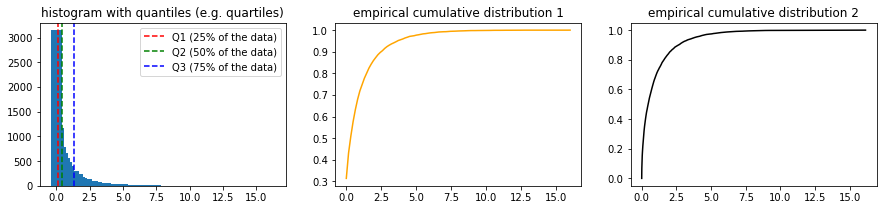

In [3]:
# histogram:
# sort the item in the set, and bucket list into required number of bins and start putting each item
# into respective buckets.
# hist[:-1]: extra boundary needs to be removed.

# plot normal and skewed distribution
x1 = torch.randn(10000)
x2 = torch.pow(torch.randn(10000), 2)
for x in (x1, x2):
    hist = torch.histogram(x, bins=100)

    _, axs = plt.subplots(1, 3, figsize=(15, 3))
    ax1, ax2, ax3 = axs[0], axs[1], axs[2]

    # hist
    ax1.bar(hist[1][:-1],hist[0]);

    # get quartiles
    # expensive operation
    # sorting requires: nlogn
    q1 = torch.quantile(x, 0.25).item()
    q2 = torch.quantile(x, 0.50).item()
    q3 = torch.quantile(x, 0.75).item()

    ax1.axvline(q1, color='r', linestyle='--', label='Q1 (25% of the data)');
    ax1.axvline(q2, color='g', linestyle='--', label='Q2 (50% of the data)');
    ax1.axvline(q3, color='b', linestyle='--', label='Q3 (75% of the data)');
    ax1.set_title('histogram with quantiles (e.g. quartiles)')
    ax1.legend();

    # cdf on hist
    cdf = torch.cumsum(hist[0], dim=0)/len(x)
    ax2.plot(hist[1][:-1], cdf, color='orange')
    ax2.set_title('empirical cumulative distribution 1')

    # cdf directly on data
    cdf2 = torch.arange(1, len(x)+1)/len(x)
    ax3.plot(x.clone().sort()[0], cdf2, color='black')
    ax3.set_title('empirical cumulative distribution 2')

plt.show();